In [ ]:
!python --version   # Python version

# About python:  https://www.python.org/
#                Python is powerful... and fast; plays well with others; runs everywhere; is friendly & easy to learn;
#                is Open –> https://www.python.org/about/.
#     Python docs: https://docs.python.org/3/ (all documentation);
#                  https://docs.python.org/3.10/ (Recommended version – 3.10).
# The Python Tutorial (python3.10): https://docs.python.org/3.10//tutorial/index.html

# Load Modules ---
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
# NumPy : The fundamental package for scientific computing with Python. NumPy is the fundamental package for scientific
#         computing in Python. It is a Python library that provides a multidimensional array object, various derived
#         objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays,
#         including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms,
#         basic linear algebra, basic statistical operations, random simulation and much more.
#     About: https://numpy.org/
#     Docs: https://numpy.org/doc/stable/
#     NumPy quickstart: https://numpy.org/doc/stable/user/quickstart.html

# Pandas: pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
#         built on top of the Python programming language.
#     About: https://pandas.pydata.org/
#     Docs: https://pandas.pydata.org/docs/
#     Getting started: https://pandas.pydata.org/docs/getting_started/index.html
#     User Guide: https://pandas.pydata.org/docs/user_guide/index.html#user-guide

# Matplotlib : Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations.
#       About: https://matplotlib.org/
#       Using Matplotlib (user guide): https://matplotlib.org/stable/users/index
#       Plot types: https://matplotlib.org/stable/plot_types/index
#       Tutorials: https://matplotlib.org/stable/tutorials/index
#       Examples: https://matplotlib.org/stable/gallery/index
#       API Reference: https://matplotlib.org/stable/api/index

# Seaborn: Seaborn is a Python data visualization library based on matplotlib. It provides a
#          high-level interface for drawing attractive and informative statistical graphics.
#   About: https://seaborn.pydata.org/

print('numpy version:',np.__version__)
print('pandas version: ',pd.__version__)
print('seaborn version:',sns.__version__)
print('pyplot: ',plt)

Python 3.7.15
numpy version: 1.21.6
pandas version:  1.3.5
seaborn version: 0.11.2
pyplot:  <module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>


# [Linear Regression](https://scikit-learn.org/stable/modules/linear_model.html) - [Ordinary Least Squares (OLS) Method](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares)

Equation of line -
`y = mx + c`

![mass-luminosity.gif](https://www.astronomynotes.com/starprop/mass-luminosity.gif)

Source: https://www.astronomynotes.com/starsun/s8.htm

## On Sample Data

### Generate and Plot Data

In [ ]:
# generate random values between 0 and 1
X=np.random.uniform(low=0,high=1,size=50)
X.sort()                              # sort array (update orignal array)
# random slope (m) and intercept (c)
m,c=np.tan(np.deg2rad(45)),np.random.randn()# generate random number from "standard normal" distribution
# same as np.random.noraml(loc=0,scale=1) or np.random.randn()
# calculate y (outputs)
y=m*X+c
# add noise to data (random noise)
y_noisy=y+np.random.normal(loc=0,scale=0.025,size=y.size)

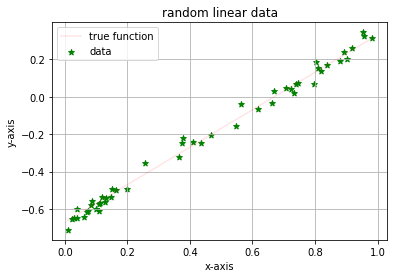

In [ ]:
# plot randomly generated linear data
plt.plot(X,y,color='r',alpha=0.1,label='true function')
plt.scatter(X,y_noisy,color='g',marker='*',label='data')
plt.grid(),plt.xlabel('x-axis'),plt.ylabel('y-axis'),plt.title('random linear data')
plt.legend()                          # show labels
plt.show()                            # make show plot

### Make model - **[Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)** model

In [ ]:
# load model - Linear Regression # https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression# linear regression class

# built model (make object)
lReg=LinearRegression()
# train model (means predict slope and intecept optimum value)
lReg.fit(X.reshape(-1,1),y_noisy)# minimize SSE (sum square error) to get coefficient (slope) and intecept optimum value)
# see calculated value of coefficient of X
print('Coefficient (slope):  calculated:',lReg.coef_,'; orginal:',m)
print('Intercept (c):  calculated:',lReg.intercept_,'; orginal:',c)

Coefficient (slope):  calculated: [1.01459624] ; orginal: 0.9999999999999999
Intercept (c):  calculated: -0.6763575832609742 ; orginal: -0.6695362136714448


### Evaluate Model

In [ ]:
# predict value of outputs "y"
y_predict=lReg.predict(X.reshape(-1,1))
# store results as pandas dataframe
results=pd.DataFrame(data={'y-true':y,'y-noisy':y_noisy,'y-predicted':y_predict})
# add difference
results['difference']=results['y-noisy']-results['y-predicted']
# see head
results.head()

,y-true,y-noisy,y-predicted,difference
0,-0.660501,-0.711590,-0.667190,-0.044400
1,-0.645154,-0.651854,-0.651619,-0.000235
2,-0.639484,-0.647452,-0.645867,-0.001585
3,-0.631913,-0.647151,-0.638185,-0.008966
4,-0.629886,-0.600904,-0.636129,0.035225


In [ ]:
# see tail
results.tail()

,y-true,y-noisy,y-predicted,difference
45,0.234025,0.203583,0.240392,-0.036810
46,0.250105,0.258106,0.256707,0.001399
47,0.284322,0.344388,0.291424,0.052964
48,0.287639,0.325320,0.294789,0.030531
49,0.312720,0.315456,0.320236,-0.004781


### Plot Results

In [ ]:
# add mean squared error (MSE) - sigma((y_true-y_predicted)^2)/total_points
# Mean squared error (MSE) Source: https://en.wikipedia.org/wiki/Mean_squared_error
mse=np.mean(np.sum(np.square(results['y-noisy']-results['y-predicted'])))
# add mean absolute error (MAE) - sigma(|y_true-y_predicted|)/total_points
# Mean absolute error (MEA) source: https://en.wikipedia.org/wiki/Mean_absolute_error
mae=np.mean(np.sum(np.abs(results['y-noisy']-results['y-predicted'])))
# see error
print('MAE:',mae)
print('MSE:',mse)
# calculate R2 score (1-SSE/SST)
print('Model score:',lReg.score(X.reshape(-1,1),y_noisy))

MAE: 1.1619810345478556
MSE: 0.0446999420605844
Model score: 0.9922369750817004


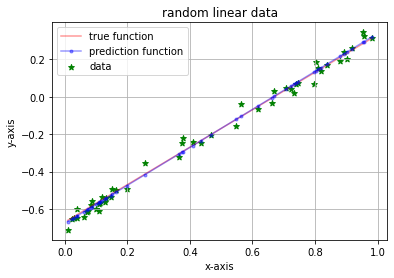

In [ ]:
# plot randomly generated linear data
plt.plot(X,y,color='r',alpha=0.4,label='true function')
plt.plot(X,y_predict,color='b',alpha=0.4,marker='.',label='prediction function')
plt.scatter(X,y_noisy,color='g',marker='*',label='data')
plt.grid(),plt.xlabel('x-axis'),plt.ylabel('y-axis'),plt.title('random linear data')
plt.legend()                          # show labels
plt.show()                            # make show plot

## On sample dataset (Salary-Prediciton-based-on-Years-of-Experience)

In [ ]:
# Source: https://drive.google.com/file/d/1m7jitaPwGHIjiuyayWiiGJgHRaZd3mIn/view?usp=drive_link
!gdown "1m7jitaPwGHIjiuyayWiiGJgHRaZd3mIn"

In [ ]:
data=pd.read_csv('salary_data.csv',sep=',')                                     # load data
data.head()                                                                     # head of data

In [ ]:
# see shape of data
data.shape

In [ ]:
# see column names
data.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [ ]:
# see data info
data.info()

In [ ]:
# see null value counts (numerical)
data.isna().sum()

In [ ]:
# plot data
data.plot(x='YearsExperience',y='Salary',marker='.',color='r')#or
#plt.plot(data['YearsExperience'],data['Salary'],marker='.',color='r')
plt.grid(),plt.xlabel('Experience (Years)'),plt.ylabel('Salary')
plt.title('Experience vs Salary')
plt.show()

In [ ]:
# load model
from sklearn.linear_model import LinearRegression

# make model (object)
lReg=LinearRegression()
# equation -> y = m*x + c
# y -> Salary, x -> YearsExperience, m -> slope (coef_), c -> intercept
# Salary = m * YearsExperience + c
# make model train (calaculate features) - find value of m and c
lReg.fit(data['YearsExperience'].values.reshape(-1,1),data['Salary'])
# print m and c
print('Slope:',lReg.coef_)
print('Intercept:',lReg.intercept_)

Slope: [9449.96232146]
Intercept: 25792.200198668696


In [ ]:
# manually - Salary = m * YearsExperience + c
y_predicted_manually=lReg.coef_*data['YearsExperience']+lReg.intercept_
# by built-in function
y_predicted=lReg.predict(data['YearsExperience'].values.reshape(-1,1))
# compair both
print('All same:',np.allclose(y_predicted_manually,y_predicted))
# create new column for predicted values
data['predicted']=y_predicted
# see final results
data.head()

All same: True


,YearsExperience,Salary,predicted
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306


In [ ]:
# see datil
data.tail()

In [ ]:
# calcualte error - MSE and MAE
from sklearn.metrics import mean_absolute_error, mean_squared_error

# print results
print('MAE:',mean_absolute_error(data['Salary'],data['predicted']))
# print results
print('MSE:',mean_squared_error(data['Salary'],data['predicted']))

MAE: 4644.2012894435375
MSE: 31270951.722280964


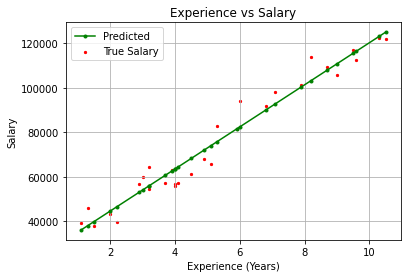

In [ ]:
# plot data
ax=data.plot.scatter(x='YearsExperience',y='Salary',marker='.',color='r')
data.plot(x='YearsExperience',y='predicted',marker='.',color='g',ax=ax)
plt.grid(),plt.xlabel('Experience (Years)'),plt.ylabel('Salary')
plt.title('Experience vs Salary'),plt.legend(['Predicted','True Salary'])
plt.show()

## [Toy Dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html) - [Diabetes Dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset)

Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.



### load data

In [ ]:
# load dataset module
from sklearn.datasets import load_diabetes

# make load dataset (as bunch)
diabetes_dataset=load_diabetes()

# see info of dataset
print(diabetes_dataset.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [ ]:
# see data shape - inputs / X / independent variables
print('Data shape (inputs):',diabetes_dataset.data.shape)# iris_dataset.data -> numpy.ndarray
# shape -> 150 rows / sample / instances, 4 - columns / features / attributes
# see feature (column) names
print('Column names:',diabetes_dataset.feature_names)
# see labels shape - outputs / y / dependent variables
print('Target shape (outputs):',diabetes_dataset.target.shape)# iris_dataset.target -> numpy.ndarray
# see labels names
print('Target range: max:',max(diabetes_dataset.target),'; min:',
      min(diabetes_dataset.target))

Data shape (inputs): (442, 10)
Column names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Target shape (outputs): (442,)
Target range: max: 346.0 ; min: 25.0


### Convert to pandas dataframe

In [ ]:
# convert dataframe to pandas
diabetes_df=pd.DataFrame(data=diabetes_dataset.data,columns=diabetes_dataset.feature_names)
# add target values
diabetes_df['target']=diabetes_dataset.target
# see head
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [ ]:
# see tail
diabetes_df.tail()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0
441,-0.045472,-0.044642,-0.073030,-0.081414,0.083740,0.027809,0.173816,-0.039493,-0.004220,0.003064,57.0


In [ ]:
# see data info
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [ ]:
# see data stats
diabetes_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [ ]:
# count for null values
diabetes_df.isna().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

### split dataset - [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [ ]:
# load dataset splitter
from sklearn.model_selection import train_test_split

# make split data (from numpy array) - (X - 2D numpy.ndarray, y - 1D numpy.array)
#Xtrain,Xtest,ytarin,ytest=train_test_split(diabetes_dataset.data,diabetes_dataset.traget,
#                                           test_size=0.33)

# make split data (from pandas dataframe) - (X - dataframe, y - series)
# X - diabetes_df.loc[:,'age':'s6'] (by loc)
# X - diabetes_df.iloc[:,[list_of_all_columns]] (by loc)
# X - diabetes_df.iloc[:,:-1] (by iloc)
# X - diabetes_df[[list_of_all_columns]]
# X - diabetes_df.drop(columns='target') (return a copy of data)
# y - diabetes_df['target']
# y - diabetes_df.loc[:,'target']
# y - diabetes_df.iloc[:,-1]
Xtrain,Xtest,ytrain,ytest=train_test_split(diabetes_df.drop(columns='target'),
                                           diabetes_df['target'],
                                           test_size=0.33)
# see shapes
Xtrain.shape,ytrain.shape,Xtest.shape,ytest.shape

((296, 10), (296,), (146, 10), (146,))

### Regression using Linear Model - LinearRegression (building Model)

In [ ]:
# load linear model - Linear Regression
from sklearn.linear_model import LinearRegression

# make model (object)
lReg=LinearRegression()
# make model train (calculate (optimized) value for m and c)
lReg.fit(Xtrain,ytrain)# equation: y =m1x1 + m2x2 + .... m10x10 + c
# see model coefficients (m)
print('Model coefficients (count):',len(lReg.coef_))
print('Model coefficients:',lReg.coef_)
# see model intercept (c)
print('Intercept coefficients:',lReg.intercept_)
# see model score
print('Model score (training):',lReg.score(Xtrain,ytrain))
print('Model score (testing):',lReg.score(Xtest,ytest))

Model coefficients (count): 10
Model coefficients: [  34.62983349 -227.99818865  543.46787399  360.18765283 -903.51372784
  510.83582363  245.27156305  320.34563627  716.24840016   68.01831964]
Intercept coefficients: 151.33679976913632
Model score (training): 0.5446340196108892
Model score (testing): 0.4416734131098591


### Model evaluation

In [ ]:
# load errors - Mean Absolute Error and Mean Squared Error
from sklearn.metrics import mean_absolute_error,mean_squared_error

# prediction on test data
predictions=lReg.predict(Xtest)

# error evaluation (on test data)
print('Mean Absolute Error (MAE):',mean_absolute_error(ytest,predictions))
print('Mean Squared Error (MSE):',mean_squared_error(ytest,predictions))

Mean Absolute Error (MAE): 46.055835642584626
Mean Squared Error (MSE): 3154.8011985589487


### Make Predictions

In [ ]:
# make prediction on all data
diabetes_df['predictions']=lReg.predict(diabetes_df.drop(columns='target')).astype(int)
# see head of data
diabetes_df.head()

In [ ]:
# see tail
diabetes_df.tail()

### plot results (testing)

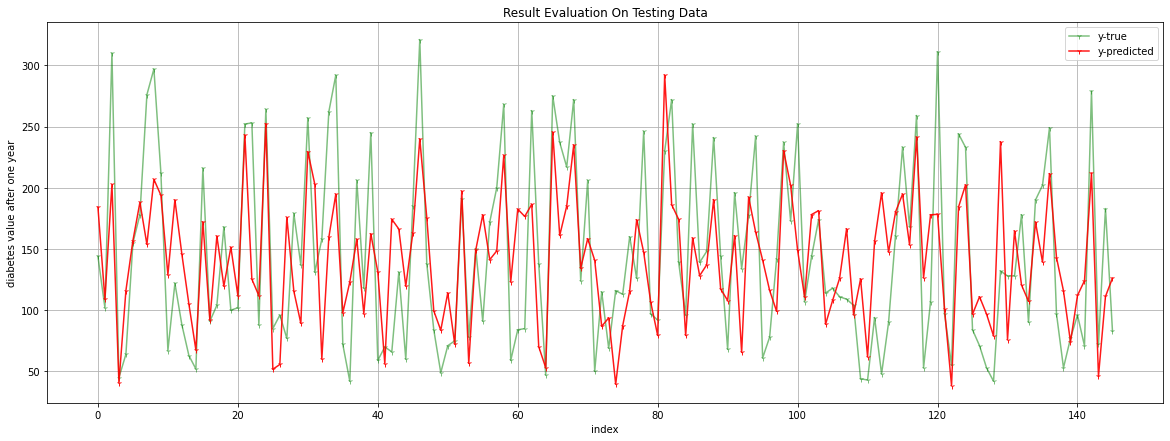

In [ ]:
# make plot (make figure and set figure size)
plt.figure(figsize=(20,7))
# plot true values
plt.plot(range(ytest.shape[0]),ytest,color='green',marker='1',alpha=0.5,label='y-true')
# plot predictions values
plt.plot(range(ytest.shape[0]),lReg.predict(Xtest),color='red',marker='*',alpha=0.9,label='y-predicted')
# plot axis and labels
plt.xlabel('index'),plt.ylabel('diabetes value after one year'),plt.title('Result Evaluation On Testing Data')
# add grid and legend
plt.grid(),plt.legend()
# make plot show
plt.show()

# What More ?

* [Underfitting vs. Overfitting ?](https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html)
* More on [Linear Models](https://scikit-learn.org/stable/modules/linear_model.html) - Regularization (penalty) - [Ridge Regression and Classification](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression-and-classification), and [Lasso Regression](https://scikit-learn.org/stable/modules/linear_model.html#lasso)

# References

* [The Python Tutorial](https://docs.python.org/3.10/tutorial/index.html)
* [NumPy quickstart](https://numpy.org/doc/stable/user/quickstart.html)
* [Matplotlib's Quick start guide](https://matplotlib.org/stable/users/explain/quick_start.html)
* [Pyplot tutorial](https://matplotlib.org/stable/tutorials/pyplot.html#sphx-glr-tutorials-pyplot-py)
* [Pyplot - image tutorial](https://matplotlib.org/stable/tutorials/images.html#sphx-glr-tutorials-images-py)
* [Matplotlib - All Tutorials](https://matplotlib.org/stable/tutorials/index.html)
* [10 Minutes to Pandas (Pandas, official tutorial)](https://pandas.pydata.org/docs/user_guide/10min.html)